In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [4]:
prediction=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
prediction

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [11]:
prediction.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
round(100*prediction.isnull().sum()/prediction.shape[0],2)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

In [19]:
prediction.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
prediction.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [13]:
prediction.shape

(5110, 12)

In [15]:
prediction.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
prediction[prediction.duplicated(keep="first")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [23]:
prediction[prediction.duplicated(keep="last")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [24]:
prediction[prediction.duplicated(keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [25]:
cat_prediction=prediction.select_dtypes(include='object')

In [26]:
cat_prediction

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [27]:
num_prediction=prediction.select_dtypes(exclude='object')

In [28]:
num_prediction

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [29]:
prediction['bmi'] = prediction['bmi'].interpolate(method='linear')

In [30]:
prediction['bmi']

0       36.60
1       34.55
2       32.50
3       34.40
4       24.00
        ...  
5105    29.30
5106    40.00
5107    30.60
5108    25.60
5109    26.20
Name: bmi, Length: 5110, dtype: float64

In [32]:
prediction['bmi'].isnull().sum()

0

In [ ]:
#What is the gender distribution among individuals in the dataset?
#What is the average age of the individuals in the dataset?
#How many individuals in the dataset have hypertension?
#What percentage of individuals in the dataset have heart disease?
#What is the most common occupation among the individuals in the dataset?
#Is there a correlation between average glucose level and age among the individuals?
#What is the distribution of smoking status among individuals who have experienced a stroke?
#Are individuals who are married more likely to have experienced a stroke compared to unmarried individuals?
#What is the average BMI (Body Mass Index) among individuals who have experienced a stroke?
#Is there a difference in the prevalence of stroke between individuals living in urban and rural areas?
#What is the distribution of stroke occurrences based on gender?
#Are individuals with hypertension more likely to have heart disease?
#What is the average glucose level among individuals who smoke?
#Is there a relationship between age and the likelihood of having hypertension?
#How does the distribution of average glucose levels differ between individuals with and without heart disease?
#Are individuals who have ever smoked more likely to have heart disease compared to those who have never smoked?
#What is the most common age range for individuals who have experienced a stroke?
#Do individuals with higher BMI tend to have higher average glucose levels?
#What is the distribution of stroke occurrences based on the type of work?
#Is there any association between smoking status and the likelihood of having heart disease?

# What is the distribution of stroke occurrences based on gender?

In [68]:
occurance=prediction[prediction['stroke']==1]

In [69]:
gender_wise=occurance['gender'].value_counts()

In [70]:
gender_wise

gender
Female    141
Male      108
Name: count, dtype: int64

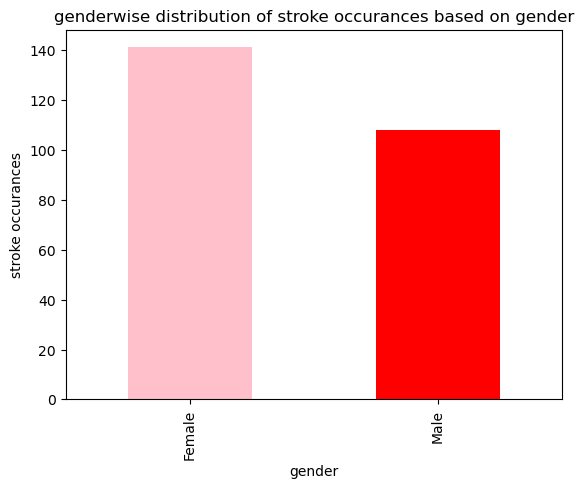

In [72]:
gender_wise.plot(kind='bar',color=['pink','red'])
plt.title('genderwise distribution of stroke occurances based on gender')
plt.xlabel('gender')
plt.ylabel('stroke occurances')
plt.show()

In [ ]:
#From the above Survey it is clear Females are affected more than males due to stroke .That female count-141 and male count is 108.

# How many individuals in the dataset have hypertension?

In [89]:
occurances=prediction[prediction['hypertension']==1]

In [94]:
occurances

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5088,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5091,6369,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.6,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [6]:
occurances=prediction['hypertension'].value_counts()

In [7]:
occurances

hypertension
0    4612
1     498
Name: count, dtype: int64

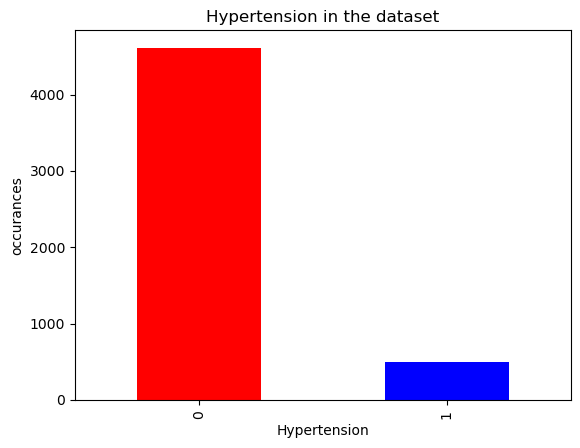

In [105]:
occurances.plot(kind='bar',color=['red','blue'])
plt.title('Hypertension in the dataset')
plt.xlabel('Hypertension')
plt.ylabel('occurances')
plt.show()

In [ ]:
#From the above graph we come to know that the person without hyper tension  is -4612 and the persons having hyper tension is 498.

# What percentage of individuals in the dataset have heart disease?

In [109]:
Heart_disease=prediction['heart_disease'].value_counts()[1]

In [111]:
round(100*Heart_disease/prediction.shape[0],2)

5.4

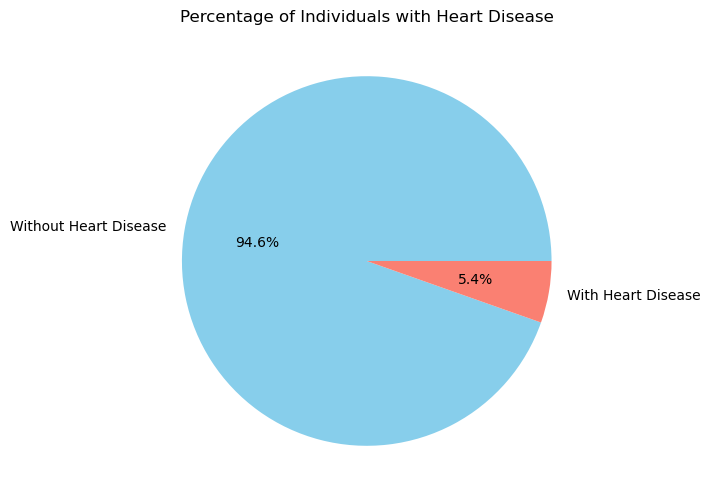

In [191]:
labels = ['Without Heart Disease', 'With Heart Disease']
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Individuals with Heart Disease')
plt.show()

In [ ]:
#From the above % of person having heart is 5.4% which is less than the % of people without Heart disease which is 94.6%.

# What is the distribution of smoking status among individuals who have experienced a stroke

In [123]:
occurance=prediction[prediction['stroke']==1]

In [151]:
smokers=occurance['smoking_status'].value_counts()

In [152]:
smokers

smoking_status
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: count, dtype: int64

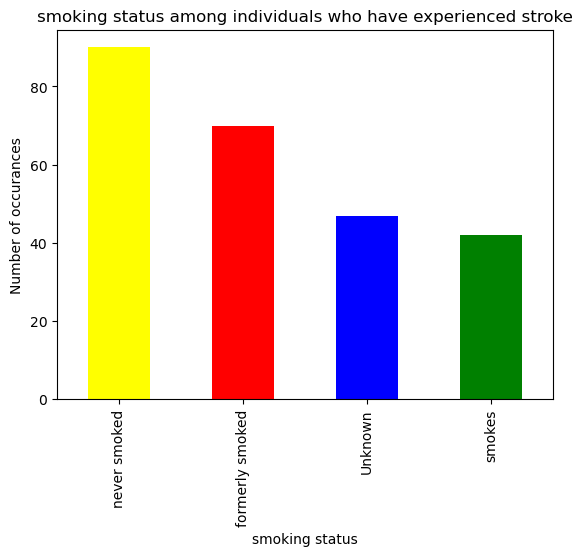

In [163]:
smokers.plot(kind='bar',color=['yellow','red','blue','green'])
plt.title('smoking status among individuals who have experienced stroke')
plt.xlabel('smoking status')
plt.ylabel('Number of occurances')
plt.show()

In [ ]:
#from the above graph we come to know that the person who has never smoked has been affected mostly by stroke and followed by formerly smoked
#peron and then followed by unknown and the atlast comes the person who smoked.

# Is there a difference in the prevalence of stroke between individuals living in urban and rural areas?

In [166]:
Areas=prediction[prediction['stroke']==1]

In [174]:
urban=Areas[Areas['Residence_type']=='Urban']

In [184]:
urban

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
234,25974,Male,78.0,0,0,Yes,Self-employed,Urban,218.46,26.8,Unknown,1
236,28493,Male,57.0,0,0,Yes,Private,Urban,86.30,31.7,Unknown,1
238,1836,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1
239,32221,Male,60.0,0,1,Yes,Private,Urban,91.92,35.9,smokes,1


In [181]:
urban.shape[0]

135

In [176]:
Areas=prediction[prediction['stroke']==1]

In [177]:
rural=Areas[Areas['Residence_type']=='Rural']

In [183]:
rural

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,23.50,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.70,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.90,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.30,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,24.45,Unknown,1


In [202]:
rural.shape[0]

114

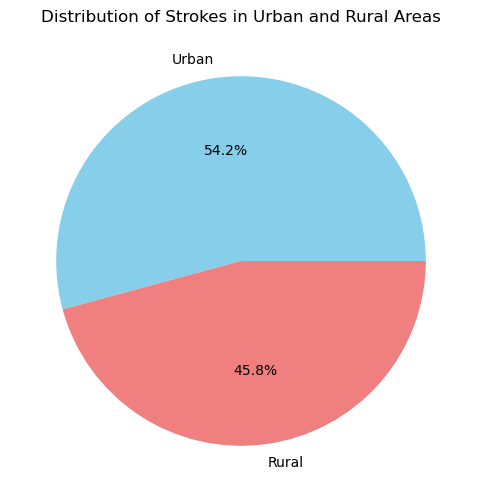

In [238]:
plt.figure(figsize=(8, 6))
plt.pie([urban.shape[0],rural.shape[0]], labels=['Urban', 'Rural'], colors=['skyblue', 'lightcoral'], autopct='%1.1f%%')
plt.title('Distribution of Strokes in Urban and Rural Areas')
plt.show()

In [ ]:
#From the above figure we come to know that person from rural area-8.5% has been affected less than the urban area .

# Is there a correlation between average glucose level and age among the individuals?

In [244]:
correlation=prediction['avg_glucose_level'].corr(prediction['age'])

In [245]:
correlation

0.23817111410174333

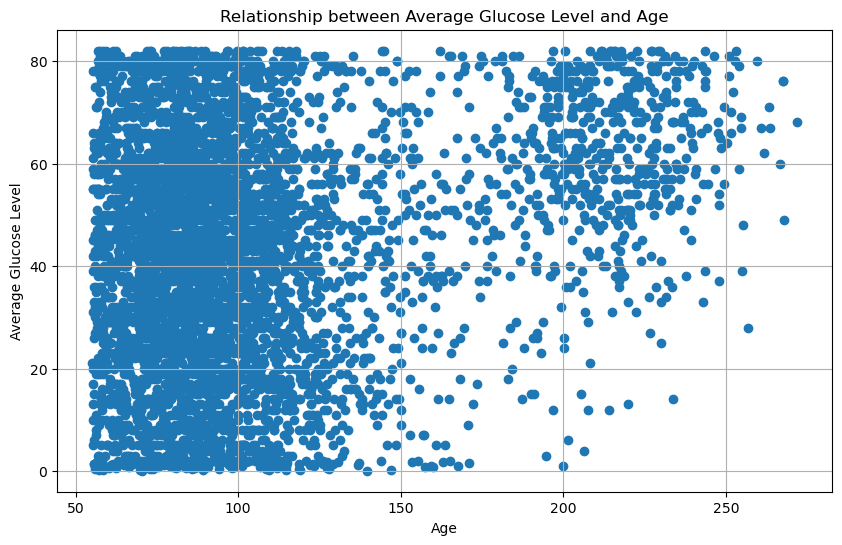

In [247]:
plt.figure(figsize=(10, 6))
plt.scatter(prediction['avg_glucose_level'],prediction['age'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Relationship between Average Glucose Level and Age')
plt.grid(True)
plt.show()

In [ ]:
#From the above graph we come to know that there is very poor corelation between average gulcose level and age.

# What is the average BMI (Body Mass Index) among individuals who have experienced a stroke?

In [251]:
status=prediction[prediction['stroke']==1]

In [262]:
average_bmi=status['bmi'].mean()

In [263]:
average_bmi

30.553815261044175

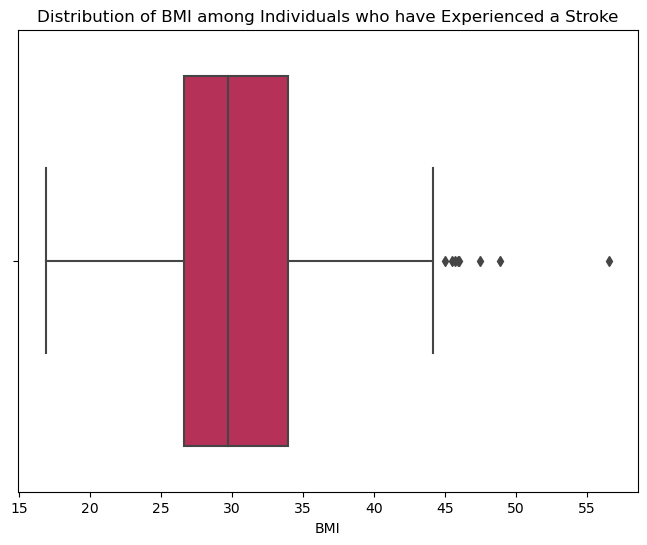

In [268]:

plt.figure(figsize=(8, 6))
sb.boxplot(data=status,x='bmi',palette='rocket')
plt.xlabel('BMI')
plt.title('Distribution of BMI among Individuals who have Experienced a Stroke')
plt.show()

In [ ]:
#From the above graph we can conclude that a person who has experienced stroke has a average golcuose level at 30.55.

# What is the distribution of stroke occurrences based on the type of work

In [271]:
stroke=prediction[prediction['stroke']==1]

In [274]:
type_work=stroke['work_type'].value_counts()

In [275]:
type_work

work_type
Private          149
Self-employed     65
Govt_job          33
children           2
Name: count, dtype: int64

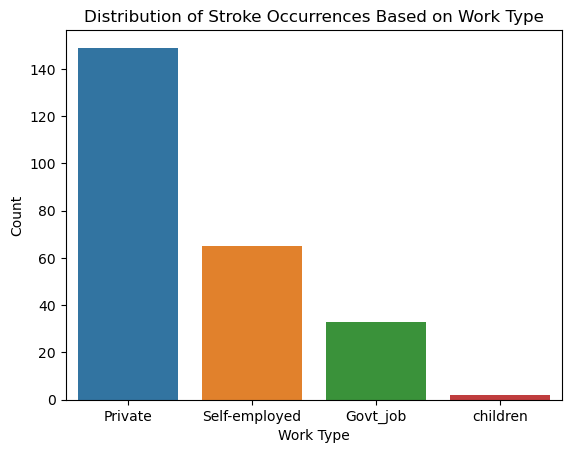

In [287]:
sb.countplot(data=stroke,x='work_type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Distribution of Stroke Occurrences Based on Work Type')
plt.show()


In [ ]:
#from the above graph we come to knoww that the person who is working in private company has been affected more by stroke followed by 
#self employed,followed by govt_job, and last comes the children and they are the least who are affected by stroke.

# Are individuals who are married more likely to have experienced a stroke compared to unmarried individuals?

In [288]:
married=prediction[prediction['stroke']==1]

In [317]:
married['ever_married'].value_counts()

ever_married
Yes    220
No      29
Name: count, dtype: int64

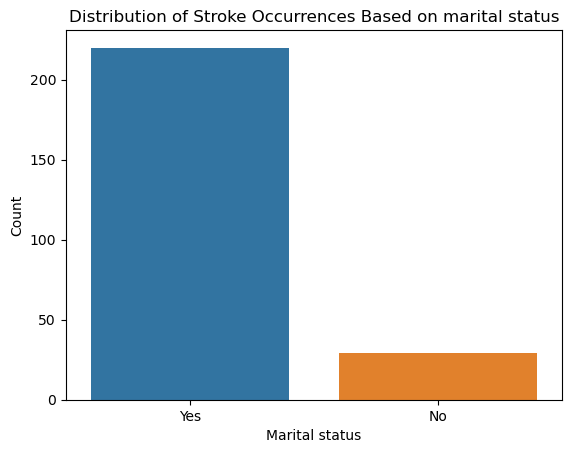

In [319]:
sb.countplot(data=married,x='ever_married')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Distribution of Stroke Occurrences Based on marital status')
plt.show()


In [ ]:
#From the above graph we came to know that the person who has got married is highly affected thai is 220 than the person who have 
#not married thai is 29.

# What is the most common age range for individuals who have experienced a stroke?

In [330]:
assumption=prediction[prediction['stroke']==1]

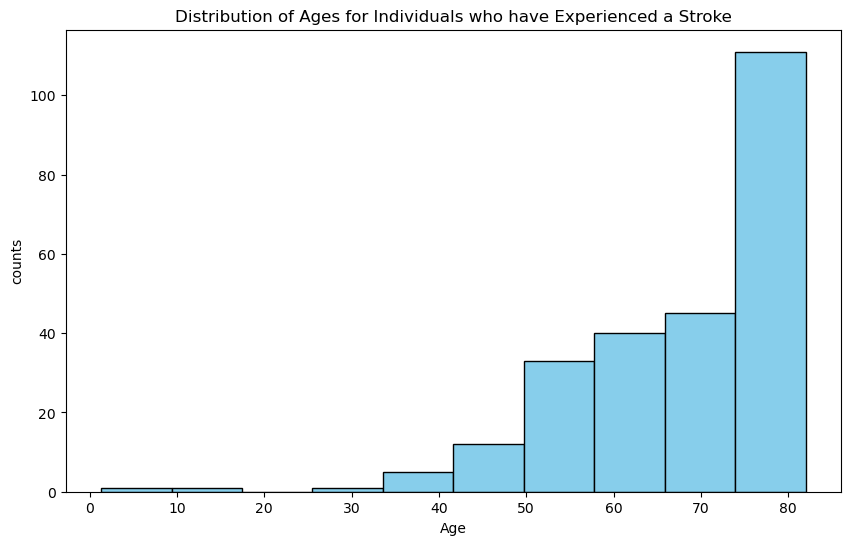

In [346]:
plt.figure(figsize=(10, 6))
plt.hist(assumption['age'], bins=10, color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Distribution of Ages for Individuals who have Experienced a Stroke')
plt.show()

In [ ]:
# From the above graph we come to know that people at the age of 80 experience more possibility of stroke occurance followed by 70,60,50
#and 40 least occurance is seen in people of age 0-30.

In [338]:
prediction.to_csv('healthcare-dataset-stroke-data.csv',index=False)

In [344]:
pwd

'C:\\Users\\admin'